<a href="https://colab.research.google.com/github/amala678/Assignment-1-and-2/blob/main/aimllab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

3. A star Algorithm


In [ ]:
def aStarAlgo(start_node, stop_node):


    open_set = set(start_node) # {A}, len{open_set}=1
    closed_set = set()
    g = {} # store the distance from starting node
    parents = {}
    g[start_node] = 0
    parents[start_node] = start_node # parents['A']='A"

    while len(open_set) > 0 :
        n = None

        for v in open_set: # v='B'/'F'
            if n == None or g[v] + heuristic(v) < g[n] + heuristic(n):
                n = v # n='A'

        if n == stop_node or Graph_nodes[n] == None:
            pass
        else:
            for (m, weight) in get_neighbors(n):
             # nodes 'm' not in first and last set are added to first
             # n is set its parent
                if m not in open_set and m not in closed_set:
                    open_set.add(m)      # m=B weight=6 {'F','B','A'} len{open_set}=2
                    parents[m] = n       # parents={'A':A,'B':A} len{parent}=2
                    g[m] = g[n] + weight # g={'A':0,'B':6, 'F':3} len{g}=2


            #for each node m,compare its distance from start i.e g(m) to the
            #from start through n node
                else:
                    if g[m] > g[n] + weight:
                    #update g(m)
                        g[m] = g[n] + weight
                    #change parent of m to n
                        parents[m] = n

                    #if m in closed set,remove and add to open
                        if m in closed_set:
                            closed_set.remove(m)
                            open_set.add(m)

        if n == None:
            print('Path does not exist!')
            return None

        # if the current node is the stop_node
        # then we begin reconstructin the path from it to the start_node
        if n == stop_node:
            path = []

            while parents[n] != n:
                path.append(n)
                n = parents[n]

            path.append(start_node)

            path.reverse()

            print('Path found: {}'.format(path))
            return path


        # remove n from the open_list, and add it to closed_list
        # because all of his neighbors were inspected
        open_set.remove(n)# {'F','B'} len=2
        closed_set.add(n) #{A} len=1

    print('Path does not exist!')
    return None

#define fuction to return neighbor and its distance
#from the passed node
def get_neighbors(v):
    if v in Graph_nodes:
        return Graph_nodes[v]
    else:
        return None
#for simplicity we ll consider heuristic distances given
#and this function returns heuristic distance for all nodes

def heuristic(n):
    H_dist = {
        'A': 10,
        'B': 8,
        'C': 5,
        'D': 7,
        'E': 3,
        'F': 6,
        'G': 5,
        'H': 3,
        'I': 1,
        'J': 0
    }

    return H_dist[n]

#Describe your graph here
Graph_nodes = {

    'A': [('B', 6), ('F', 3)],
    'B': [('C', 3), ('D', 2)],
    'C': [('D', 1), ('E', 5)],
    'D': [('C', 1), ('E', 8)],
    'E': [('I', 5), ('J', 5)],
    'F': [('G', 1),('H', 7)] ,
    'G': [('I', 3)],
    'H': [('I', 2)],
    'I': [('E', 5), ('J', 3)],

}
aStarAlgo('A', 'J')

Path found: ['A', 'F', 'G', 'I', 'J']


['A', 'F', 'G', 'I', 'J']

4. Find-S Algorithm

In [ ]:
import csv
print("\n The most general hypothesis :['?','?','?','?','?','?']\n")
print("\n The most specific hypothesis :['0','0','0','0','0','0']\n")


a = []
with open('enjoysport.csv', 'r') as csvFile:
    reader = csv.reader(csvFile)
    for row in reader:
        a.append(row)
        print(row)
    csvFile.close()

num_attributes = len(a[0]) - 1


hypothesis = ['0'] * num_attributes
print('Initial Value of the hypothesis: ')
print(hypothesis)
for j in range(0, num_attributes):
    hypothesis[j] = a[1][j]
print(hypothesis)

print('\nFind S: Finding Maximally specific hypothesis\n')
for i in range(1, len(a)):
    if a[i][num_attributes] == 'yes':
        for j in range(num_attributes):
            if a[i][j] != hypothesis[j]:
                hypothesis[j] = '?'
            else:
                hypothesis[j] = a[i][j]
    print("For training example no :{0} the hypothesis is".format(i), hypothesis)

print("\n The Maximally Specific Hypothesis for a given Training Examples:\n")
print(hypothesis)



 The most general hypothesis :['?','?','?','?','?','?']


 The most specific hypothesis :['0','0','0','0','0','0']

['sky', 'airTemp', 'humidity', 'wind', 'water', 'forecast', 'enjoySport']
['sunny', 'warm', 'normal', 'strong', 'warm', 'same', 'yes']
['sunny', 'warm', 'high', 'strong', 'warm', 'same', 'yes']
['rainy', 'cold', 'high', 'strong', 'warm', 'change', 'no']
['sunny', 'warm', 'high', 'strong', 'cool', 'change', 'yes']
Initial Value of the hypothesis: 
['0', '0', '0', '0', '0', '0']
['sunny', 'warm', 'normal', 'strong', 'warm', 'same']

Find S: Finding Maximally specific hypothesis

For training example no :1 the hypothesis is ['sunny', 'warm', 'normal', 'strong', 'warm', 'same']
For training example no :2 the hypothesis is ['sunny', 'warm', '?', 'strong', 'warm', 'same']
For training example no :3 the hypothesis is ['sunny', 'warm', '?', 'strong', 'warm', 'same']
For training example no :4 the hypothesis is ['sunny', 'warm', '?', 'strong', '?', '?']

 The Maximally Specific H

5. Candidate Elimination Algorithm

In [ ]:
import csv

with open("trainingexamples.csv") as f:
    csv_file = csv.reader(f)
    data = list(csv_file)

    specific = data[1][:-1]
    general = [['?' for i in range(len(specific))] for j in range(len(specific))]

    for i in data:
        if i[-1] == "Yes":
            for j in range(len(specific)):
                if i[j] != specific[j]:
                    specific[j] = "?"
                    general[j][j] = "?"

        elif i[-1] == "No":
            for j in range(len(specific)):
                if i[j] != specific[j]:
                    general[j][j] = specific[j]
                else:
                    general[j][j] = "?"

        print("\nStep " + str(data.index(i)+1) + " of Candidate Elimination Algorithm")
        print(specific)
        print(general)

    gh = [] # gh = general Hypothesis
    for i in general:
        for j in i:
            if j != '?':
                gh.append(i)
                break
    print("\nFinal Specific hypothesis:\n", specific)
    print("\nFinal General hypothesis:\n", gh)


Step 1 of Candidate Elimination Algorithm
['Sunny', 'Warm', 'Normal', 'Strong', 'Warm', 'Same']
[['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?']]

Step 2 of Candidate Elimination Algorithm
['Sunny', 'Warm', 'Normal', 'Strong', 'Warm', 'Same']
[['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?']]

Step 3 of Candidate Elimination Algorithm
['Sunny', 'Warm', '?', 'Strong', 'Warm', 'Same']
[['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?']]

Step 4 of Candidate Elimination Algorithm
['Sunny', 'Warm', '?', 'Strong', 'Warm', 'Same']
[['Sunny', '?', '?', '?', '?', '?'], ['?', 

In [2]:
l=[[1,2,3],[4,5,6]]
print(l[1][:-1])

[4, 5]


6. ID3 Algorithm

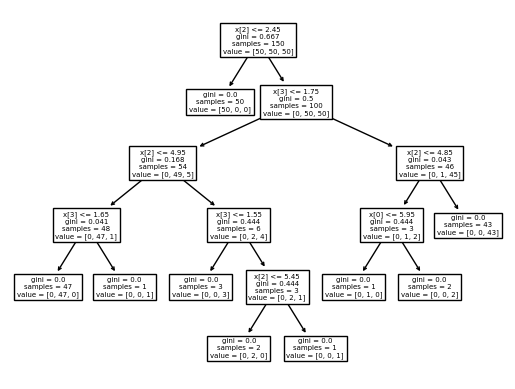

Accuracy: 30


In [8]:
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

iris = load_iris()
X, y = iris.data, iris.target
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)
tree.plot_tree(clf)
plt.show()

iris = load_iris()
X, y = iris.data, iris.target


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)


y_pred = clf.predict(X_test)


accuracy = accuracy_score(y_test, y_pred,normalize=False)
print(f"Accuracy: {accuracy}")


7. Backpropagation Algorithm

In [ ]:
import numpy as np
X = np.array(([2, 9], [1, 5], [3, 6]), dtype=float)
y = np.array(([92], [86], [89]), dtype=float)
X = X/np.amax(X,axis=0) # maximum of X array longitudinally
y = y/100

#Sigmoid Function
def sigmoid (x):
    return 1/(1 + np.exp(-x))

#Derivative of Sigmoid Function
def derivatives_sigmoid(x):
    return x * (1 - x)

#Variable initialization
epoch=5000                #Setting training iterations
lr=0.1                    #Setting learning rate
inputlayer_neurons = 2    #number of features in data set
hiddenlayer_neurons = 3   #number of hidden layers neurons
output_neurons = 1        #number of neurons at output layer

#weight and bias initialization
wh=np.random.uniform(size=(inputlayer_neurons,hiddenlayer_neurons))
bh=np.random.uniform(size=(1,hiddenlayer_neurons))
wout=np.random.uniform(size=(hiddenlayer_neurons,output_neurons))
bout=np.random.uniform(size=(1,output_neurons))


#draws a random range of numbers uniformly of dim x*y
for i in range(epoch):

#Forward Propogation
    hinp1=np.dot(X,wh)
    hinp=hinp1 + bh
    hlayer_act = sigmoid(hinp)
    outinp1=np.dot(hlayer_act,wout)
    outinp= outinp1+ bout
    output = sigmoid(outinp)

#Backpropagation
    EO = y-output
    outgrad = derivatives_sigmoid(output)
    d_output = EO* outgrad
    EH = d_output.dot(wout.T)

#how much hidden layer wts contributed to error
    hiddengrad = derivatives_sigmoid(hlayer_act)
    d_hiddenlayer = EH * hiddengrad

# dotproduct of nextlayererror and currentlayerop
    wout += hlayer_act.T.dot(d_output) *lr
    wh += X.T.dot(d_hiddenlayer) *lr


print("Input: \n" + str(X))
print("Actual Output: \n" + str(y))
print("Predicted Output: \n" ,output)

Input: 
[[0.66666667 1.        ]
 [0.33333333 0.55555556]
 [1.         0.66666667]]
Actual Output: 
[[0.92]
 [0.86]
 [0.89]]
Predicted Output: 
 [[0.89393655]
 [0.87995227]
 [0.896269  ]]


8. Naive Bayesian Classifier

In [ ]:
# import necessary libraries
import pandas as pd
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Load Data from CSV
data = pd.read_csv('tennisdata.csv')
print("The first 5 Values of data is :\n", data.head())

# obtain train data and train output
X = data.iloc[:, :-1]
print("\nThe First 5 values of the train data is\n", X.head())
y = data.iloc[:, -1]
print("\nThe First 5 values of train output is\n", y.head())

# convert them in numbers
le_outlook = LabelEncoder()
X.Outlook = le_outlook.fit_transform(X.Outlook)

le_Temperature = LabelEncoder()
X.Temperature = le_Temperature.fit_transform(X.Temperature)

le_Humidity = LabelEncoder()
X.Humidity = le_Humidity.fit_transform(X.Humidity)

le_Windy = LabelEncoder()
X.Windy = le_Windy.fit_transform(X.Windy)

print("\nNow the Train output is\n", X.head())

le_PlayTennis = LabelEncoder()
y = le_PlayTennis.fit_transform(y)
print("\nNow the Train output is\n",y)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20)

classifier = GaussianNB()
classifier.fit(X_train, y_train)


print("Accuracy is:", accuracy_score(classifier.predict(X_test), y_test))

The first 5 Values of data is :
     Outlook Temperature Humidity   Windy PlayTennis
0     Sunny         Hot     High    Weak         No
1     Sunny         Hot     High  Strong         No
2  Overcast         Hot     High    Weak        Yes
3      Rain        Mild     High    Weak        Yes
4      Rain        Cool   Normal    Weak        Yes

The First 5 values of the train data is
     Outlook Temperature Humidity   Windy
0     Sunny         Hot     High    Weak
1     Sunny         Hot     High  Strong
2  Overcast         Hot     High    Weak
3      Rain        Mild     High    Weak
4      Rain        Cool   Normal    Weak

The First 5 values of train output is
 0     No
1     No
2    Yes
3    Yes
4    Yes
Name: PlayTennis, dtype: object

Now the Train output is
    Outlook  Temperature  Humidity  Windy
0        2            1         0      1
1        2            1         0      0
2        0            1         0      1
3        1            2         0      1
4        1         

<ipython-input-17-59b95dbf5443>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.Outlook = le_outlook.fit_transform(X.Outlook)
<ipython-input-17-59b95dbf5443>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.Temperature = le_Temperature.fit_transform(X.Temperature)
<ipython-input-17-59b95dbf5443>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.py

11. EM Algorithm

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Observation: The GMM using EM algorithm based clustering matched the true labels more closely than the Kmeans.


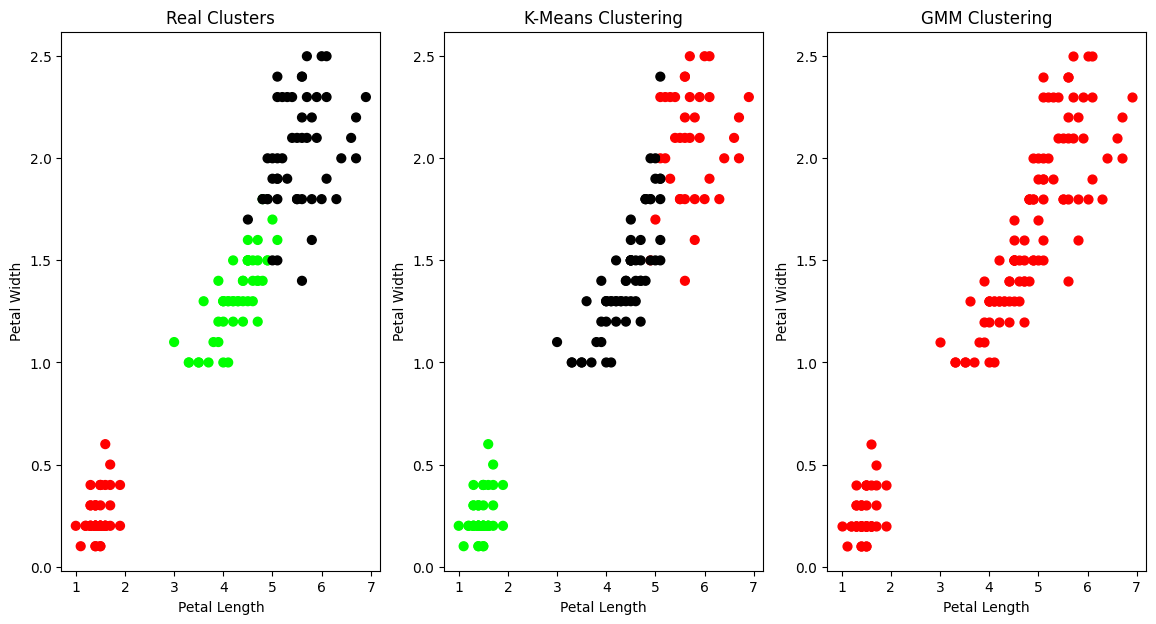

In [ ]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.mixture import GaussianMixture
# import some data to play with
iris = datasets.load_iris()
X = pd.DataFrame(iris.data)
X.columns = ['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width']
y = pd.DataFrame(iris.target)
y.columns = ['Targets']

# Build the K Means Model
model = KMeans(n_clusters=3)
model.fit(X) # model.labels_ : Gives cluster no for which samples belongs to

# # Visualise the clustering results
plt.figure(figsize=(14,7))
colormap = np.array(['red', 'lime', 'black'])

# Plot the Original Classifications using Petal features
plt.subplot(1, 3, 1)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[y.Targets], s=40)
plt.title('Real Clusters')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

# Plot the Models Classifications
plt.subplot(1, 3, 2)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[model.labels_], s=40)
plt.title('K-Means Clustering')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

# General EM for GMM


# transform your data such that its distribution will have a # mean value 0 and standard deviation of 1.
scaler = preprocessing.StandardScaler()
scaler.fit(X)
xsa = scaler.transform(X)
xs = pd.DataFrame(xsa, columns = X.columns)

gmm = GaussianMixture(n_components=40)
gmm.fit(xs)
plt.subplot(1, 3, 3)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[0], s=40)
plt.title('GMM Clustering')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

print('Observation: The GMM using EM algorithm based clustering matched the true labels more closely than the Kmeans.')

12. k-nearest neighbour Algorithm

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets
iris=datasets.load_iris()
print("Iris Data set loaded...")
x_train, x_test, y_train, y_test = train_test_split(iris.data,iris.target,test_size=0.1)
#random_state=0
for i in range(len(iris.target_names)):
    print("Label", i , "-",str(iris.target_names[i]))
classifier = KNeighborsClassifier(n_neighbors=2)
classifier.fit(x_train, y_train)
y_pred=classifier.predict(x_test)
print("Results of Classification using K-nn with K=1 ")
for r in range(0,len(x_test)):
    print(" Sample:", str(x_test[r]), " Actual-label:", str(y_test[r])," Predicted-label:", str(y_pred[r]))

print("Classification Accuracy :" , classifier.score(x_test,y_test))

Iris Data set loaded...
Label 0 - setosa
Label 1 - versicolor
Label 2 - virginica
Results of Classification using K-nn with K=1 
 Sample: [4.4 3.2 1.3 0.2]  Actual-label: 0  Predicted-label: 0
 Sample: [7.1 3.  5.9 2.1]  Actual-label: 2  Predicted-label: 2
 Sample: [6.1 3.  4.6 1.4]  Actual-label: 1  Predicted-label: 1
 Sample: [5.8 2.6 4.  1.2]  Actual-label: 1  Predicted-label: 1
 Sample: [5.6 2.5 3.9 1.1]  Actual-label: 1  Predicted-label: 1
 Sample: [6.3 2.3 4.4 1.3]  Actual-label: 1  Predicted-label: 1
 Sample: [5.7 2.5 5.  2. ]  Actual-label: 2  Predicted-label: 2
 Sample: [6.4 3.2 5.3 2.3]  Actual-label: 2  Predicted-label: 2
 Sample: [5.4 3.4 1.5 0.4]  Actual-label: 0  Predicted-label: 0
 Sample: [6.4 2.7 5.3 1.9]  Actual-label: 2  Predicted-label: 2
 Sample: [4.7 3.2 1.6 0.2]  Actual-label: 0  Predicted-label: 0
 Sample: [5.5 3.5 1.3 0.2]  Actual-label: 0  Predicted-label: 0
 Sample: [5.8 2.7 3.9 1.2]  Actual-label: 1  Predicted-label: 1
 Sample: [5.  3.5 1.6 0.6]  Actual-labe

13. Regression

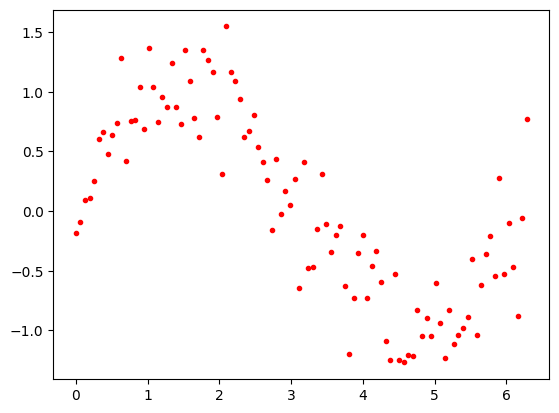

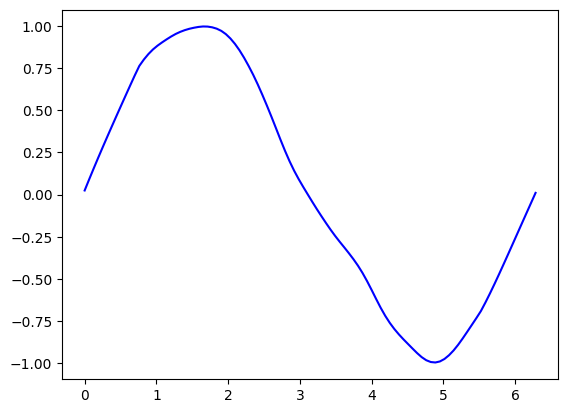

In [5]:
"""Implement the non-parametric Locally Weighted Regression algorithm in order to fit data point’s .Select
appropriate data set for your experiment and draw graphs """

from math import ceil
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt
import math
def lowess(x, y, f, iterations):
    n = len(x)
    r = int(ceil(f * n))
    h = [np.sort(np.abs(x - x[i]))[r] for i in range(n)]
    w = np.clip(np.abs((x[:, None] - x[None, :]) / h), 0.0, 1.0)
    w = (1 - w ** 3) ** 3
    yest = np.zeros(n)
    delta = np.ones(n)
    for iteration in range(iterations):
        for i in range(n):
            weights = delta * w[:, i]
            b = np.array([np.sum(weights * y), np.sum(weights * y * x)])
            A = np.array([[np.sum(weights), np.sum(weights * x)], [np.sum(weights * x), np.sum(weights * x * x)]])
            beta = linalg.solve(A, b)
            yest[i] = beta[0] + beta[1] * x[i]

        residuals = y - yest
        s = np.median(np.abs(residuals))
        delta = np.clip(residuals / (6.0 * s), -1, 1)
        delta = (1 - delta ** 2) ** 2

    return yest




n = 100
x = np.linspace(0, 2 * math.pi, n)
y = np.sin(x) + 0.3 * np.random.randn(n)
f = 0.25
iterations = 3
yest = lowess(x, y, f, iterations)



plt.plot(x, y, "r.")
plt.show()
plt.plot(x, yest, "b-")
plt.show()

1. BFS

In [ ]:
graph = {
  '5' : ['3','7'],
  '3' : ['2', '4'],
  '7' : ['8'],
  '2' : [],
  '4' : ['8'],
  '8' : []
}

visited = [] # List for visited nodes.
queue = []     #Initialize a queue

def bfs(visited, graph, node): #function for BFS
  visited.append(node)
  queue.append(node)

  while queue:          # Creating loop to visit each node
    m = queue.pop(0)
    print (m, end = " ")

    for neighbour in graph[m]:
      if neighbour not in visited:
        visited.append(neighbour)
        queue.append(neighbour)

# Driver Code
print("Following is the Breadth-First Search")
bfs(visited, graph, '5')

Following is the Breadth-First Search
5 3 7 2 4 8 

1. DFS

In [ ]:
# Using a Python dictionary to act as an adjacency list
graph = {
  '5' : ['3','7'],
  '3' : ['2', '4'],
  '7' : ['8'],
  '2' : [],
  '4' : ['8'],
  '8' : []
}

visited = set() # Set to keep track of visited nodes of graph.

def dfs(visited, graph, node):  #function for dfs
    if node not in visited:
        print (node)
        visited.add(node)
        for neighbour in graph[node]:
            dfs(visited, graph, neighbour)

# Driver Code
print("Following is the Depth-First Search")
dfs(visited, graph, '5')

Following is the Depth-First Search
5
3
2
4
8
7


2. DLS

In [ ]:
graph = {
    'A':['B','C'],
    'B':['D','E'],
    'C':['F','G'],
    'D':['H','I'],
    'E':['J','K'],
    'F':['L','M'],
    'G':['N','O'],
    'H':[],
    'I':[],
    'J':[],
    'K':[],
    'L':[],
    'M':[],
    'N':[],
    'O':[]
}

def DLS(start,goal,path,level,maxD):
  print('\nCurrent level-->',level)
  print('Goal node testing for',start)
  path.append(start)
  if start == goal:
    print("Goal test successful")
    return path
  print('Goal node testing failed')
  if level==maxD:
    return False
  print('\nExpanding the current node',start)
  for child in graph[start]:
    if DLS(child,goal,path,level+1,maxD):
      return path
    path.pop()
  return False



start = 'A'
goal = input('Enter the goal node:-')
maxD = int(input("Enter the maximum depth limit:-"))
print()
path = list()
res = DLS(start,goal,path,0,maxD)
if(res):
    print("Path to goal node available")
    print("Path",path)
else:
    print("No path available for the goal node in given depth limit")

Enter the goal node:-F
Enter the maximum depth limit:-3


Current level--> 0
Goal node testing for A
Goal node testing failed

Expanding the current node A

Current level--> 1
Goal node testing for B
Goal node testing failed

Expanding the current node B

Current level--> 2
Goal node testing for D
Goal node testing failed

Expanding the current node D

Current level--> 3
Goal node testing for H
Goal node testing failed

Current level--> 3
Goal node testing for I
Goal node testing failed

Current level--> 2
Goal node testing for E
Goal node testing failed

Expanding the current node E

Current level--> 3
Goal node testing for J
Goal node testing failed

Current level--> 3
Goal node testing for K
Goal node testing failed

Current level--> 1
Goal node testing for C
Goal node testing failed

Expanding the current node C

Current level--> 2
Goal node testing for F
Goal test successful
Path to goal node available
Path ['A', 'C', 'F']


2. IDDFS

In [ ]:
graph = {
    'A': ['B', 'C'],
    'B': ['D','E'],
    "C": ['G'],
    'D': [],
    'E': ['F'],
    'G': [],
    'F':[]
}

path = list()

def DFS(currentNode,destination,graph,maxDepth,curList):
    print("Checking for destination",currentNode)
    curList.append(currentNode)
    if currentNode==destination:
        return True
    if maxDepth<=0:
        path.append(curList)
        return False
    for node in graph[currentNode]:
        if DFS(node,destination,graph,maxDepth-1,curList):
            return True
        else:
            curList.pop()
    return False

def iterativeDDFS(currentNode,destination,graph,maxDepth):
    for i in range(maxDepth):
        curList = list()
        if DFS(currentNode,destination,graph,i,curList):
            return True
    return False

if not iterativeDDFS('A','E',graph,4):
    print("Path is not available")
else:
    print("A path exists")
    print(path.pop())

Checking for destination A
Checking for destination A
Checking for destination B
Checking for destination C
Checking for destination A
Checking for destination B
Checking for destination D
Checking for destination E
A path exists
['A', 'B', 'E']
